### Potential Dataset from Campaigns after Kepler Breakdown


Another dataset available is the cumulative data from subsequent Kepler missions called Kepler 2 campaigns. This data that was taken after the initial malfunction of the navigation gears of the ship. It was still able to take images of other parts of the sky using the pressure from the sun as a gear. This dataset includes the star names, planet names and more details of the stars including their position in the sky.


imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://www.kaggle.com/nasa/kepler-exoplanet-search-results

This dataset is cumulative obserbations from Kepler spaceship of Kepler Objects of Interest (KOI). The classifications are Candidates, Confirmed and False Positive exoplanets. The data are light, dimensions, orbits and temperature measurements with their margins of error of ~10,000 stars.

In [4]:
df = pd.read_csv('cumulative.csv')

In [13]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [15]:
#df = df.reset_index('rowid', inplace=True, drop=True)

In [14]:
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

- Exoplanet Archive Disposition
- Disposition Using Kepler Data
- Disposition Score
- Non Transit-Like False Positive Flag
- Stellar Eclipse False Positive Flag
- Centroid Offset False Positive Flag
- Ephemeris Match Indicates Contamination False Positve Flag
- Orbital Period [days] +/-
- Transit Epoch [BKJD] +/-
- Impact Parameter +/-
- Transit Duration [hrs] +/-
- Transit Depth [ppm] +/-
- Planetary Radius [Earth Radii] +/-
- Equilibrium Temperature [K] (and 2 NaN fields)
- Isoation Flux [Earth Flux] : 'koi_insol','koi_insol_err1', 'koi_insol_err2'
- Transit Signal-to-Noise : 'koi_model_snr'
- TCE Planet Number : 'koi_tce_plnt_num'
- TCE Delivery : 'koi_tce_delivname'
- Stellar Effective Temperature [K] +/- : 'koi_steff', 'koi_steff_err1', 'koi_steff_err2'
- Stellar Surface Gravity : 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2'
- Stellar Radius [Solar Radii]:  'koi_srad','koi_srad_err1', 'koi_srad_err2'
- Right Ascension : 'ra'
- Declination : 'dec'
- Keplar Band [mag]: 'koi_kepmag'

In [16]:
df.shape

(9564, 50)

Exoplanet Archive Disposition

In [17]:
#Exoplanet Archive Disposition
df['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

Disposition Using Kepler Data

In [18]:
#Disposition Using Kepler Data
df['koi_pdisposition'].value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

Stellar Radius [Solar Radii]

In [19]:
#Stellar Radius [Solar Radii]
#Star dimensions relative to our sun
df['koi_srad'].describe() 

count    9201.000000
mean        1.728712
std         6.127185
min         0.109000
25%         0.829000
50%         1.000000
75%         1.345000
max       229.908000
Name: koi_srad, dtype: float64

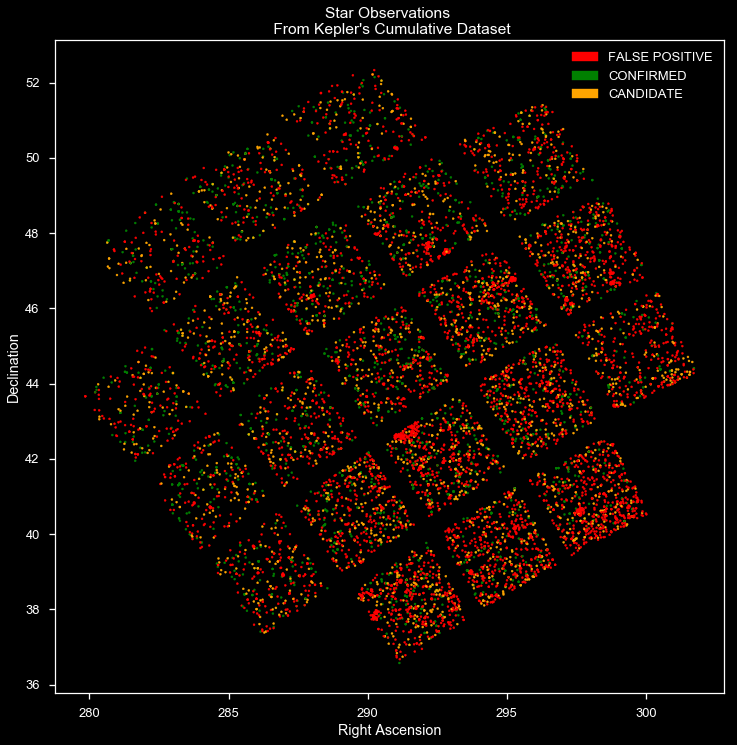

In [45]:
import matplotlib.patches as mpatches
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

y = df['dec'].values
x = df['ra'].values

#Set Color for classification of exoplanets
color_dict = { 'FALSE POSITIVE':'red', 'CONFIRMED':'green', 'CANDIDATE':'orange' }

patchList = []
for key in color_dict:
        data_key = mpatches.Patch(color=color_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)

#Set Size of star marker
s = np.log(df['koi_srad'])**2.5

ax.set_title("Star Observations \n From Kepler's Cumulative Dataset")
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')
ax.scatter(x=x,y=y, color=[color_dict[i] for i in df['koi_disposition']], s=4 )

#handles, _ = ax.get_legend_handles_labels()
#ax.legend(df['koi_disposition'])

plt.show()

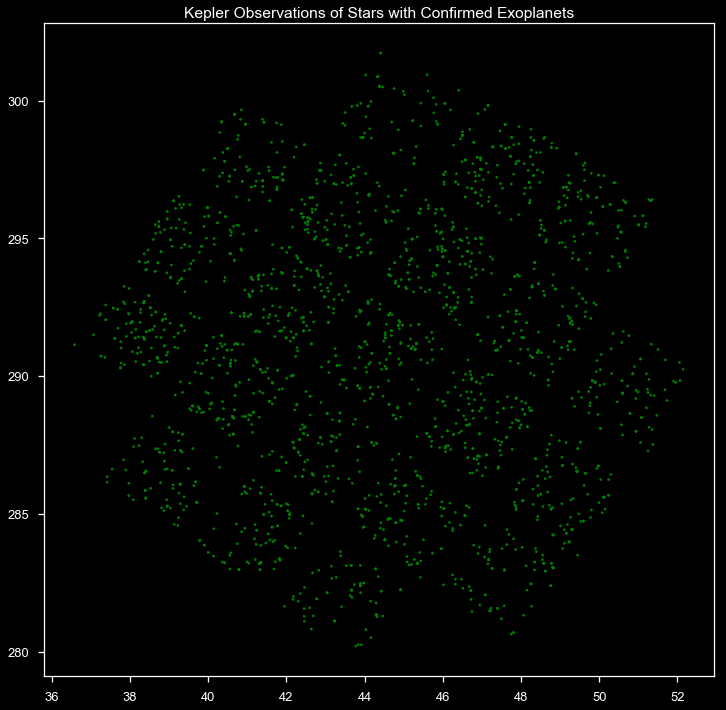

In [42]:
confirmed_df = df[df['koi_disposition']=='CONFIRMED']

sns.set(style="ticks", context="talk")
x = confirmed_df['dec'].values
y = confirmed_df['ra'].values

#Set Color for classification of exoplanets
color_dict = { 'FALSE POSITIVE':'red', 'CONFIRMED':'green', 'CANDIDATE':'orange' }
#**kwargs(markeredgewidth=1.5)

#Set Size of star marker
#s = np.log(confirmed_df['koi_srad'])**4.2

plt.style.use("dark_background")
plt.figure(figsize=(12,12))
plt.title('Kepler Observations of Stars with Confirmed Exoplanets')
plt.scatter(x=x,y=y, color=[color_dict[i] for i in confirmed_df['koi_disposition']], s=5 )
plt.show();

In [32]:
stardf = df[['koi_disposition','koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2']]

In [33]:
stardf.head()

,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2
0,CONFIRMED,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,...,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061
1,CONFIRMED,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061
2,FALSE POSITIVE,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078
3,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067
4,CONFIRMED,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133


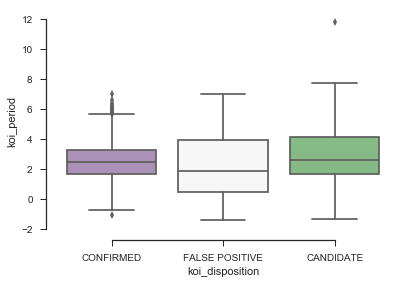

In [169]:
import seaborn as sns
sns.set(style="ticks")

# Draw a boxplot to show period by disposition
y = np.log(df["koi_period"])
sns.boxplot(x='koi_disposition', y=y,  data=stardf, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

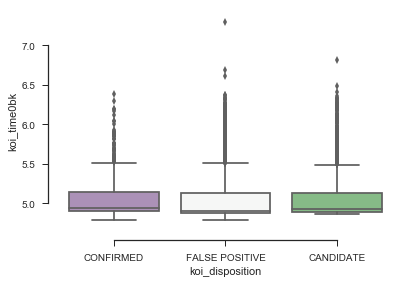

In [170]:
# Draw a boxplot to show time by disposition
y = np.log(df["koi_time0bk"])
sns.boxplot(x='koi_disposition', y=y,  data=stardf, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


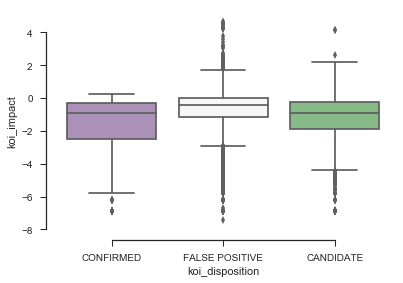

In [171]:
# Draw a boxplot to show impact by disposition
y = np.log(df["koi_impact"])
sns.boxplot(x='koi_disposition', y=y,  data=stardf, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()